In [1]:
# Mounting drive to access data
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [2]:
# Extracting files
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content")

In [3]:
# Defining the dataset path
import os
dataset_directory = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(dataset_directory))

Contents of the base directory: ['test', 'validation', 'train']


In [7]:
# Importing necessary libraries and defining the paths
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

train_data_path = '/content/cats_vs_dogs_small/train'
validation_data_path = '/content/cats_vs_dogs_small/validation'
test_data_path = '/content/cats_vs_dogs_small/test'


In [8]:
# Loading training dataset
train_dataset = keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.


In [9]:
# Loading validation dataset
validation_dataset = keras.preprocessing.image_dataset_from_directory(
    validation_data_path,
    image_size=(180, 180),
    batch_size=32)


Found 1000 files belonging to 2 classes.


In [11]:
# Loading test dataset
test_dataset = keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    image_size=(180, 180),
    batch_size=32)


Found 1000 files belonging to 2 classes.


In [12]:
# Displaying sample images from dataset
def display_sample_images(image_dataset):
    plt.figure(figsize=(10, 10))
    for image_batch, label_batch in image_dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.axis("off")


In [13]:
# Displaying sample images with labels
def display_sample_images(image_dataset):
    plt.figure(figsize=(10, 10))
    for image_batch, label_batch in image_dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title("Cat" if label_batch[i] == 0 else "Dog")
            plt.axis("off")
    plt.show()


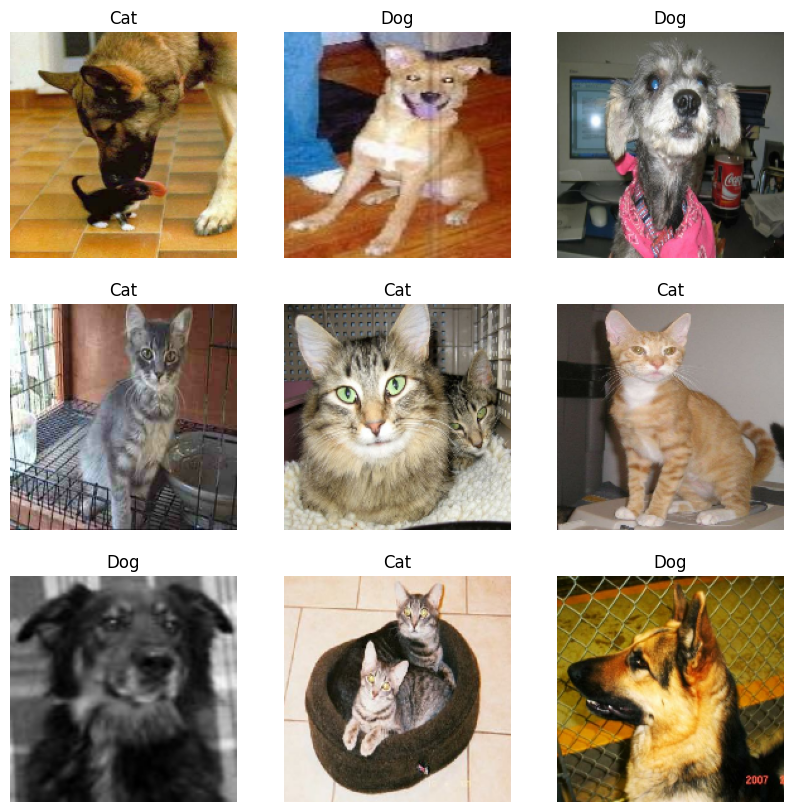

In [14]:
# Displaying the sample images
display_sample_images(train_dataset)


In [15]:
# Building CNN model
def build_cnn_classifier():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [16]:
# Data augmentation and preprocessing data
def prepare_data_generators(train_data_path, validation_data_path, batch_size, num_samples=None):
    train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

    train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    validation_generator = val_datagen.flow_from_directory(
        validation_data_path,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, validation_generator


In [17]:
# Training the model
def train_model(model, train_generator, validation_generator, epochs=30):
    training_history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs
    )
    return training_history


In [18]:
# Training the model from scratch with 1000 samples
train_generator_1, validation_generator_1 = prepare_data_generators(
    train_data_path,
    validation_data_path,
    batch_size=32,
    num_samples=1000
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Building the model
classifier_model_A = build_cnn_classifier()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Training the model with 1000 samples
training_log_A = train_model(classifier_model_A, train_generator_1, validation_generator_1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 383ms/step - accuracy: 0.5115 - loss: 0.9613 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.5070 - loss: 0.6933 - val_accuracy: 0.5380 - val_loss: 0.6922
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5152 - loss: 0.6941 - val_accuracy: 0.5340 - val_loss: 0.6871
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.5399 - loss: 0.6871 - val_accuracy: 0.5890 - val_loss: 0.6827
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.5688 - loss: 0.6862 - val_accuracy: 0.6260 - val_loss: 0.6524
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.5910 - loss: 0.6753 - val_accuracy: 0.6460 - val_loss: 0.6578
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.5635 - loss: 0.6835 - val_accuracy: 0.5620 - val_loss: 0.6804
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.6052 - loss: 0.6644 - val_accu

In [21]:
# Training the model from scratch with 1500 samples
train_generator_2, validation_generator_2 = prepare_data_generators(
    train_data_path,
    validation_data_path,
    batch_size=32,
    num_samples=1500
)

classifier_model_B = build_cnn_classifier()
training_log_B = train_model(classifier_model_B, train_generator_2, validation_generator_2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 384ms/step - accuracy: 0.4838 - loss: 0.8408 - val_accuracy: 0.5100 - val_loss: 0.6917
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.5175 - loss: 0.6920 - val_accuracy: 0.6010 - val_loss: 0.6636
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.6107 - loss: 0.6755 - val_accuracy: 0.6250 - val_loss: 0.6459
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.6057 - loss: 0.6588 - val_accuracy: 0.6430 - val_loss: 0.6467
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.6221 - loss: 0.6589 - val_accuracy: 0.6840 - val_loss: 0.5966
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.6535 - loss: 0.6270 - val_accuracy: 0.6800 - val_loss: 0.5913
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.7022 - loss: 0.5871 - val_accuracy: 0.7020 - val_loss: 0.5991
Epoch 8/30
63

In [22]:
# Training the model from scratch with 2000 samples
train_generator_3, validation_generator_3 = prepare_data_generators(
    train_data_path,
    validation_data_path,
    batch_size=32,
    num_samples=2000
)

classifier_model_C = build_cnn_classifier()
training_log_C = train_model(classifier_model_C, train_generator_3, validation_generator_3)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 384ms/step - accuracy: 0.5274 - loss: 1.0822 - val_accuracy: 0.5220 - val_loss: 0.6928
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - accuracy: 0.5161 - loss: 0.6938 - val_accuracy: 0.4960 - val_loss: 0.6891
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5414 - loss: 0.6875 - val_accuracy: 0.6110 - val_loss: 0.6772
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5698 - loss: 0.6832 - val_accuracy: 0.5860 - val_loss: 0.6518
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.6044 - loss: 0.6708 - val_accuracy: 0.6480 - val_loss: 0.6401
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 365ms/step - accuracy: 0.5991 - loss: 0.6639 - val_accuracy: 0.6440 - val_loss: 0.6299
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.6282 - loss: 0.6344 - val_accuracy: 0.6890 - val_loss: 0.6088
Epoch 8/30
63

In [23]:
# Using VGG16 to train the model
def build_pretrained_cnn_classifier():
    base_model = applications.VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(180, 180, 3)
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [25]:
# Training the VGG16 model

classifier_model_P1 = build_pretrained_cnn_classifier()
training_log_P1 = train_model(classifier_model_P1, train_generator_1, validation_generator_1)

classifier_model_P2 = build_pretrained_cnn_classifier()
training_log_P2 = train_model(classifier_model_P2, train_generator_2, validation_generator_2)

classifier_model_P3 = build_pretrained_cnn_classifier()
training_log_P3 = train_model(classifier_model_P3, train_generator_3, validation_generator_3)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 656ms/step - accuracy: 0.7056 - loss: 0.9460 - val_accuracy: 0.8640 - val_loss: 0.3337
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 650ms/step - accuracy: 0.8456 - loss: 0.3601 - val_accuracy: 0.8920 - val_loss: 0.2399
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 640ms/step - accuracy: 0.8613 - loss: 0.3153 - val_accuracy: 0.8940 - val_loss: 0.2586
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 645ms/step - accuracy: 0.8594 - loss: 0.3417 - val_accuracy: 0.8860 - val_loss: 0.2757
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 645ms/step - accuracy: 0.8716 - loss: 0.2951 - val_accuracy: 0.8780 - val_loss: 0.3194
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 639ms/step - accuracy: 0.8617 - loss: 0.3367 - val_accuracy: 0.8890 - val_loss: 0.2498
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 642ms/step - accuracy: 0.8766 - loss: 0.2876 - val_accuracy: 0.8940 - val_loss: 0.2475
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 638m

In [26]:
# Visualizing the performance
def visualize_performance(training_history, title):
    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    epochs_range = range(len(accuracy))

    plt.figure()
    plt.plot(epochs_range, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, 'r', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs_range, loss, 'b', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()


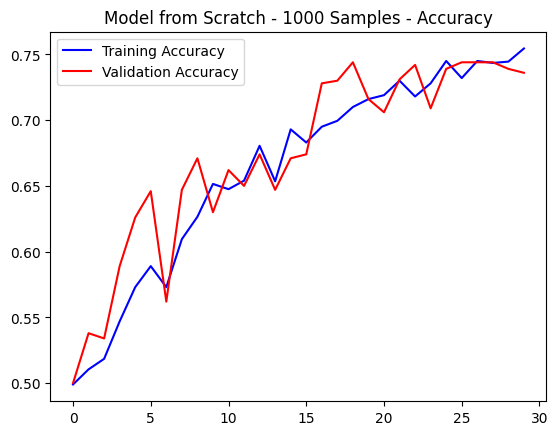

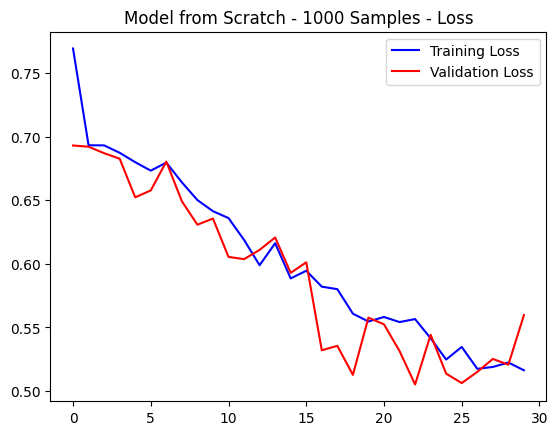

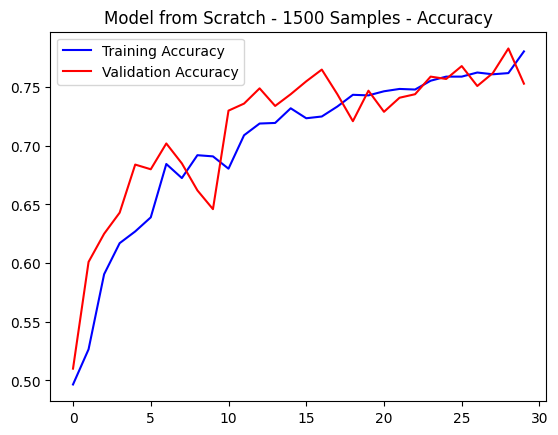

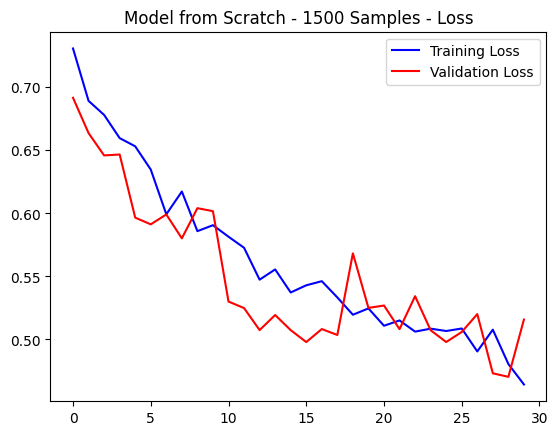

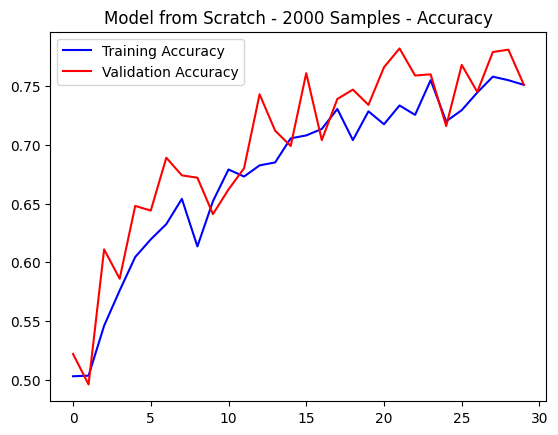

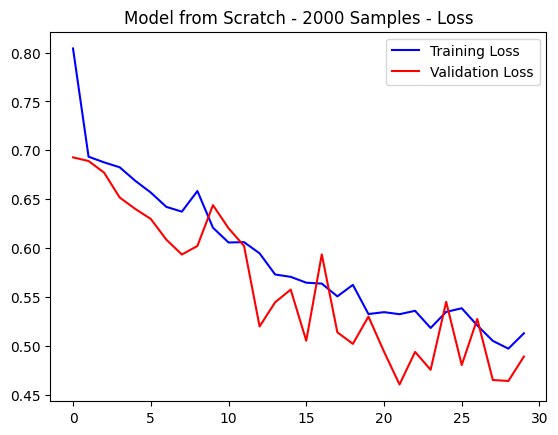

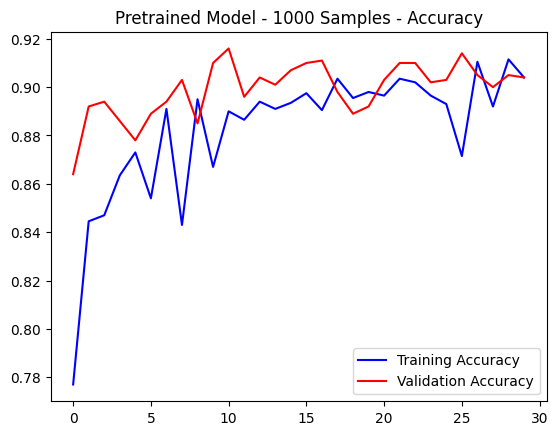

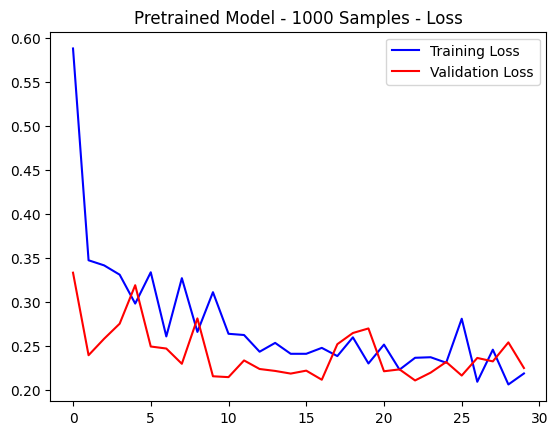

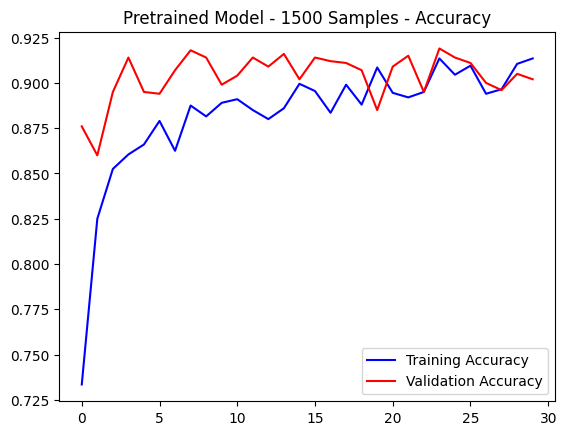

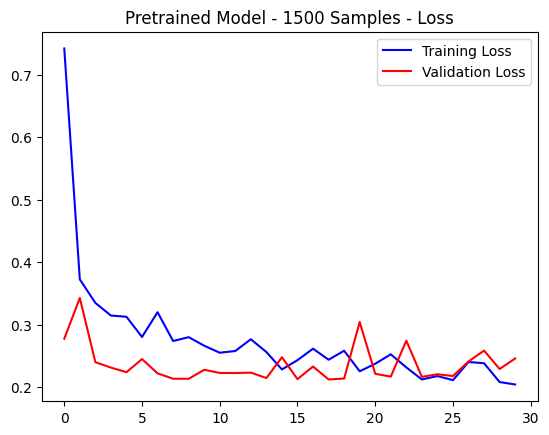

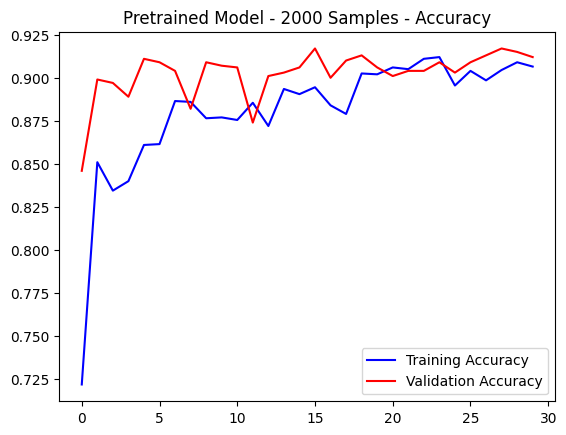

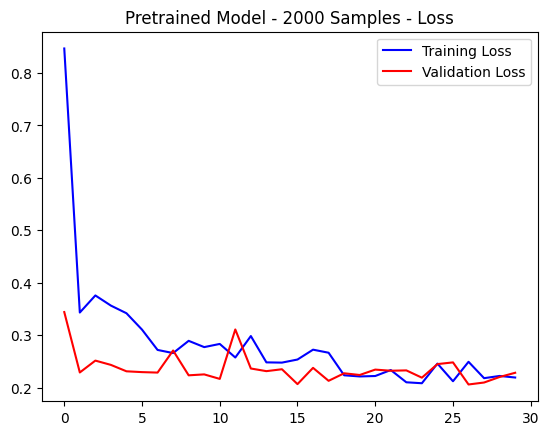

In [27]:
# Plotting performance for each CNN classifier model

visualize_performance(training_log_A, 'Model from Scratch - 1000 Samples')
visualize_performance(training_log_B, 'Model from Scratch - 1500 Samples')
visualize_performance(training_log_C, 'Model from Scratch - 2000 Samples')

visualize_performance(training_log_P1, 'Pretrained Model - 1000 Samples')
visualize_performance(training_log_P2, 'Pretrained Model - 1500 Samples')
visualize_performance(training_log_P3, 'Pretrained Model - 2000 Samples')


In [28]:
# Final results
def aggregate_results(training_histories, model_labels):
    summary = {}
    for i, history in enumerate(training_histories):
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]

        summary[model_labels[i]] = {
            'Final Training Accuracy': final_train_acc,
            'Final Validation Accuracy': final_val_acc,
            'Final Training Loss': final_train_loss,
            'Final Validation Loss': final_val_loss
        }
    return summary

all_histories = [
    training_log_A, training_log_B, training_log_C,
    training_log_P1, training_log_P2, training_log_P3
]

model_labels = [
    'Model from Scratch - 1000 Samples',
    'Model from Scratch - 1500 Samples',
    'Model from Scratch - 2000 Samples',
    'Pretrained Model - 1000 Samples',
    'Pretrained Model - 1500 Samples',
    'Pretrained Model - 2000 Samples'
]

final_scores = aggregate_results(all_histories, model_labels)


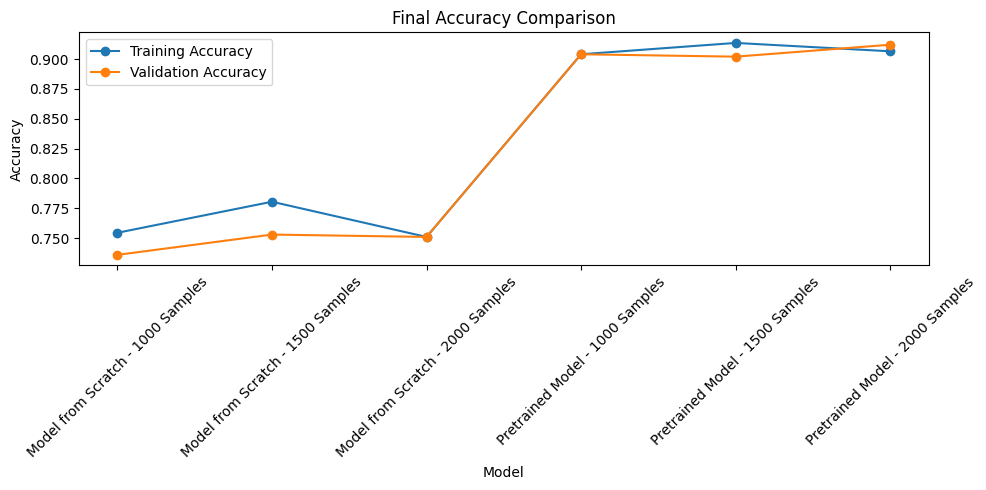

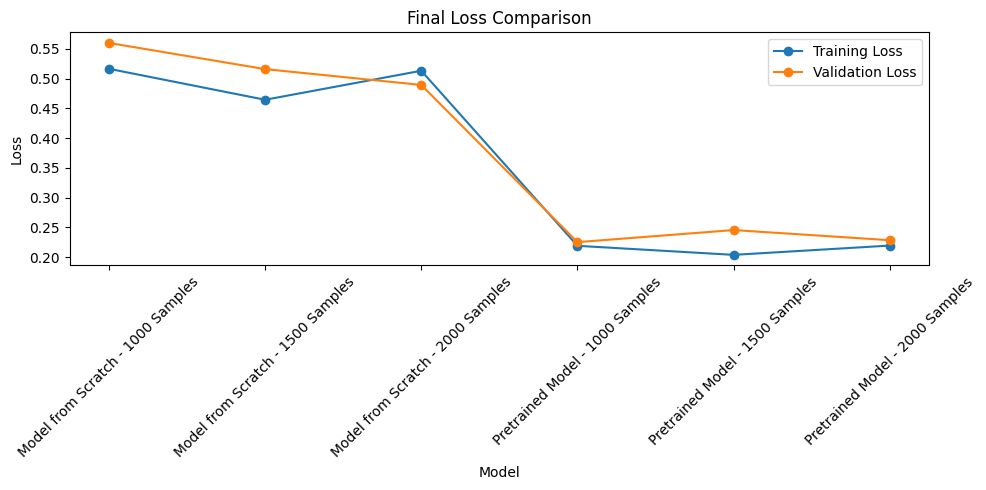

In [29]:
# Comparing final accuracy and loss
def compare_classifier_models(final_scores):
    model_labels = list(final_scores.keys())

    train_acc = [final_scores[label]['Final Training Accuracy'] for label in model_labels]
    val_acc = [final_scores[label]['Final Validation Accuracy'] for label in model_labels]
    train_loss = [final_scores[label]['Final Training Loss'] for label in model_labels]
    val_loss = [final_scores[label]['Final Validation Loss'] for label in model_labels]

    plt.figure(figsize=(10, 5))
    plt.plot(model_labels, train_acc, label='Training Accuracy', marker='o')
    plt.plot(model_labels, val_acc, label='Validation Accuracy', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(model_labels, train_loss, label='Training Loss', marker='o')
    plt.plot(model_labels, val_loss, label='Validation Loss', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Loss Comparison')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_classifier_models(final_scores)
